In [39]:
import pandas as pd
import scipy.io
import os
import mne

In [40]:
data = os.path.dirname("./data/")
data_files = os.listdir(data)

In [41]:
# files_5f = [file for file in data_files if "5F" in file]
files_NoMT = [file for file in data_files if "NoMT" in file]
# files_HaLT = [file for file in data_files if "HaLT" in file]
files_FREEFORM = [file for file in data_files if "FREEFORM" in file]
# files_CLA = [file for file in data_files if ("CLA" in file) and (not "SubjectJ" in file)]
# files_CLA_SubjectJ = [file for file in data_files if "CLA-" in file]

In [42]:
mat = scipy.io.loadmat(os.path.join(data, files_NoMT[0]))

In [43]:
for key in mat:
    print(key)

__header__
__version__
__globals__
o


In [44]:
mat["o"][0][0][0]  #marker

array(['201604221523.D091BB44'], dtype='<U21')

In [45]:
mat["o"][0][0][1]  #Data

array(['NK-data import (auto)'], dtype='<U21')

In [46]:
mat["o"][0][0][2]  #Hz of the signals (sampFreq)

array([[200]], dtype=uint8)

In [47]:
mat["o"][0][0][3]  #Number of samples

array([[664400]])

In [48]:
mat["o"][0][0][4]  #len 718600

# Values from 0 to 99, state of the eGUI

# The marker codes from 1 to 6 encode the visual stimuli directing the participants to implement given mental
# imageries in the order 

# CLA, HaLT, and FreeForm recording sessions.
# 1: “left hand,” 2: “right hand,” 3: “passive or neutral,” 4: “left leg,” 5: “tongue,” and 6:“right leg”

# For 5 F recording sessions, the codes are 
# 1: “thumb,” 2: “index finger,” 3: “middle finger,” 4: “ring finger,” and 5: “pinkie finger”

# Codes greater than 10 indicate service periods including 
# 99: “initial relaxation,” 91: “inter-session breaks,” 92: “experiment end.” Code “0” means “blank” or nothing is displayed in eGUI

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [49]:
mat["o"][0][0][5]  #(718600, 22)

# each column is the time-series of voltage measurements
# from a single EEG input lead such as F3 or C3


array([[ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
       [ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
       [ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
       ...,
       [-26.72, -24.98, -16.28, ...,  -6.11,  17.88, -11.86],
       [-38.43, -35.16, -24.71, ..., -12.61,  12.62, -10.64],
       [-24.91, -22.64,  -5.6 , ...,   0.97,  26.97, -10.31]])

In [50]:
mat["o"][0][0][6]

array([[array(['Fp1'], dtype='<U3')],
       [array(['Fp2'], dtype='<U3')],
       [array(['F3'], dtype='<U2')],
       [array(['F4'], dtype='<U2')],
       [array(['C3'], dtype='<U2')],
       [array(['C4'], dtype='<U2')],
       [array(['P3'], dtype='<U2')],
       [array(['P4'], dtype='<U2')],
       [array(['O1'], dtype='<U2')],
       [array(['O2'], dtype='<U2')],
       [array(['A1'], dtype='<U2')],
       [array(['A2'], dtype='<U2')],
       [array(['F7'], dtype='<U2')],
       [array(['F8'], dtype='<U2')],
       [array(['T3'], dtype='<U2')],
       [array(['T4'], dtype='<U2')],
       [array(['T5'], dtype='<U2')],
       [array(['T6'], dtype='<U2')],
       [array(['Fz'], dtype='<U2')],
       [array(['Cz'], dtype='<U2')],
       [array(['Pz'], dtype='<U2')],
       [array(['X5'], dtype='<U2')]], dtype=object)

In [51]:
sampling_freq = mat["o"][0][0][2][0][0]  #Hz of the signals (sampFreq)

In [52]:
n_samples = mat["o"][0][0][3][0][0]

In [53]:
ch_names = [element[0][0] for element in mat["o"][0][0][6]]
ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'A1',
 'A2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz',
 'X5']

In [54]:
data = mat["o"][0][0][5]

In [55]:
mat["o"][0][0][4]


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [56]:
df = pd.DataFrame(mat["o"][0][0][5], columns=ch_names)
df["State_eGUI"] = mat["o"][0][0][4]
df

Fp1    Fp2     F3     F4     C3    C4     P3    P4     O1     O2  \
0       -0.00  -0.00  -0.00  -0.00  -0.00 -0.00  -0.00 -0.00  -0.00  -0.00   
1       -0.00  -0.00  -0.00  -0.00  -0.00 -0.00  -0.00 -0.00  -0.00  -0.00   
2       -0.00  -0.00  -0.00  -0.00  -0.00 -0.00  -0.00 -0.00  -0.00  -0.00   
3       -0.00  -0.00  -0.00  -0.00  -0.00 -0.00  -0.00 -0.00  -0.00  -0.00   
4       -0.00  -0.00  -0.00  -0.00  -0.00 -0.00  -0.00 -0.00  -0.00  -0.00   
...       ...    ...    ...    ...    ...   ...    ...   ...    ...    ...   
664395 -15.43 -17.92  -4.51  -6.95   6.61 -7.80   9.05  5.26  10.68   6.48   
664396 -33.25 -28.39 -17.48 -16.19  -3.19  0.87   1.61 -0.69   1.72  -1.53   
664397 -26.72 -24.98 -16.28  -8.36  -1.30  0.73   0.71 -0.20   2.75   2.29   
664398 -38.43 -35.16 -24.71 -19.55  -7.39  6.05  -5.85 -2.92  -2.95  -1.85   
664399 -24.91 -22.64  -5.60  -2.30  10.44 -9.21  13.68  8.56  18.11  17.12   

        ...     F8    T3     T4     T5     T6     Fz     Cz     Pz     X5  \
0       ...  -0.00 -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00   
1       ...  -0.00 -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00   
2       ...  -0.00 -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00   
3       ...  -0.00 -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00   
4       ...  -0.00 -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00  -0.00   
...     ...    ...   ...    ...    ...    ...    ...    ...    ...    ...   
664395  ...  -3.58  7.99  12.88   7.59  -0.31 -14.72  -1.35  22.09 -13.05   
664396  ... -15.19 -5.49  -8.18  -1.70  -9.12 -26.84  -7.27  16.24 -12.42   
664397  ...  -9.01 -8.90   0.81  -1.39  -4.54 -23.03  -6.11  17.88 -11.86   
664398  ... -20.20 -2.05 -13.13  -8.32 -10.93 -30.80 -12.61  12.62 -10.64   
664399  ...  -5.32  9.11  14.64  11.71   6.18 -17.38   0.97  26.97 -10.31   

        State_eGUI  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
664395           0  
664396           0  
664397           0  
664398           0  
664399           0  

[664400 rows x 23 columns]

In [57]:
df["State_eGUI"].hist(bins=100)

<AxesSubplot:>

In [58]:
df = df[df["State_eGUI"] == 0]
# df = df.drop(columns=["State_eGUI", "X5"])
df = df.drop(columns=["State_eGUI"])

df = df.T
# ch_names.remove("X5")
ch_types = ['eeg'] * 21
ch_types.append("stim")

In [59]:
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)

In [60]:
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1, A2, F7, F8, T3, ...
 chs: 21 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 200.0 Hz
>


In [61]:
raw_data = mne.io.RawArray(df.to_numpy(), info)

Creating RawArray with float64 data, n_channels=22, n_times=420231
    Range : 0 ... 420230 =      0.000 ...  2101.150 secs
Ready.


In [62]:
from mne.channels import make_standard_montage

montage = make_standard_montage(
    "standard_prefixed"
)  # To load the standard electrodes map for plotting ICA components

In [63]:
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (33.005 sec)

Fitting ICA to data using 21 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


Selecting by number: 21 components
Fitting ICA took 7.1s.


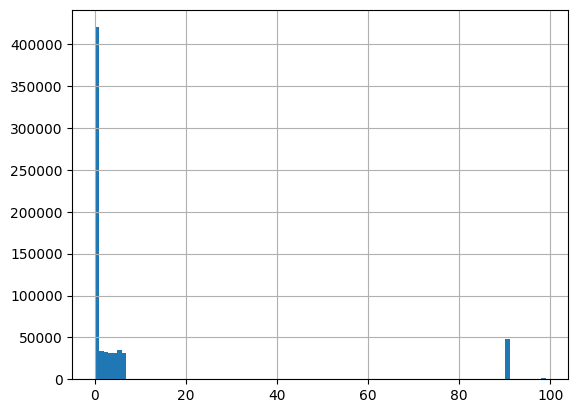

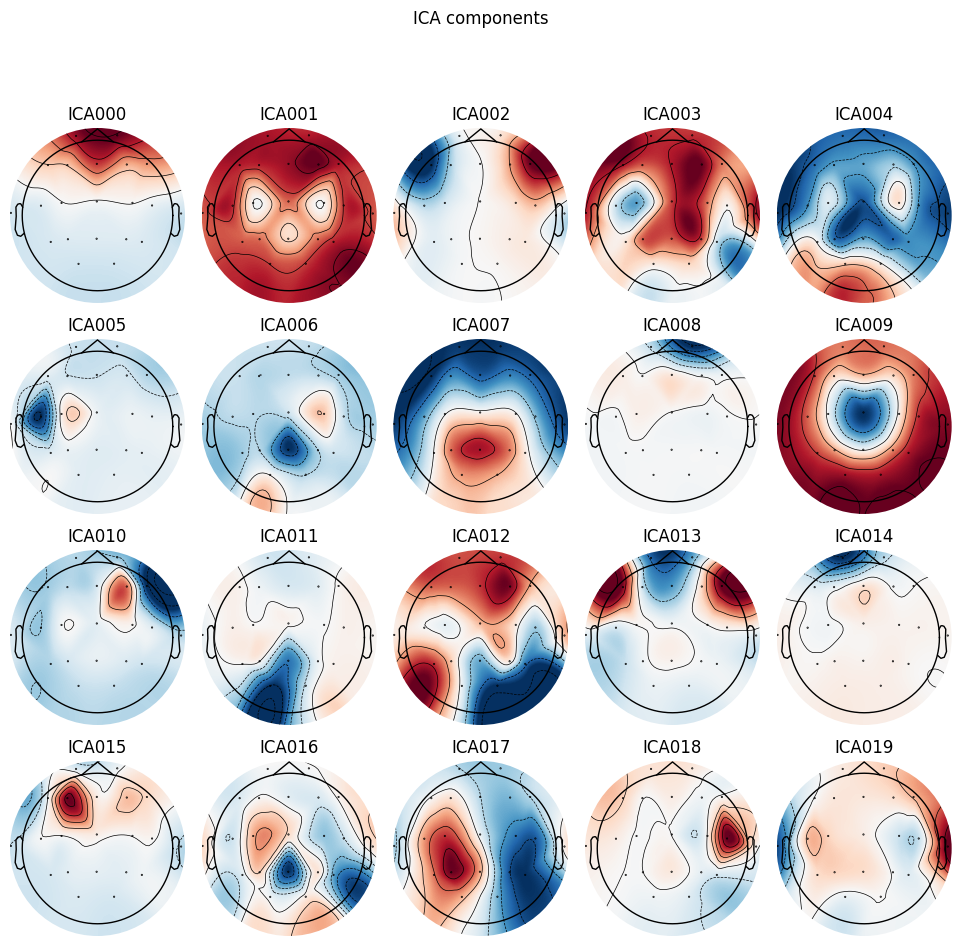

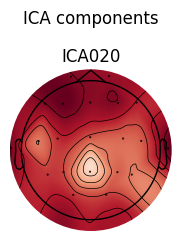

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 195x260.5 with 1 Axes>]

In [64]:
def FIR_zero_phase_filter_func(raw_object):
    # Try 7Hz instead of 0.1
    return raw_object.load_data().filter(0.1, 30, method="fir", phase="zero")

filtered_data = FIR_zero_phase_filter_func(raw_data)

filtered_data.set_montage(montage)

ica_obj = mne.preprocessing.ICA(n_components=21, random_state=36)

ica_obj.fit(filtered_data)

ica_obj.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1050 matching events found
No baseline correction applied
0 projection items activated


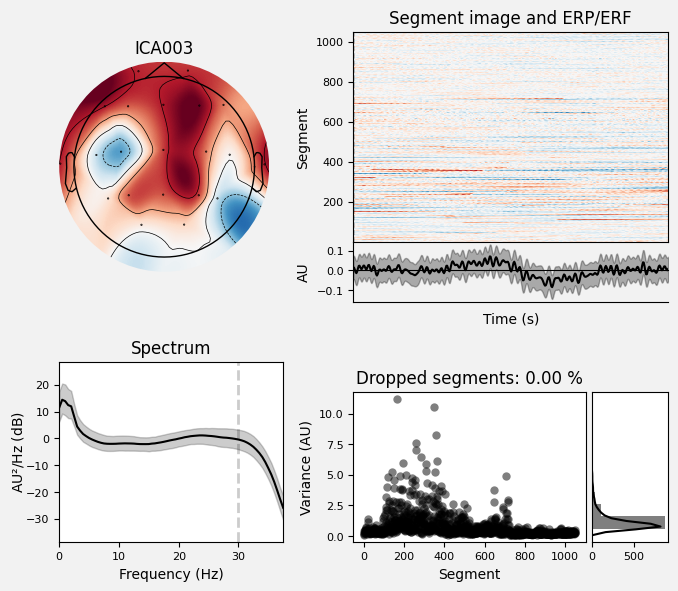

[<Figure size 700x600 with 6 Axes>]

In [65]:
ica_obj.plot_properties(filtered_data, picks=3)

In [66]:
# ica_obj.exclude = [0, 1, 2, 3, 4, 5]

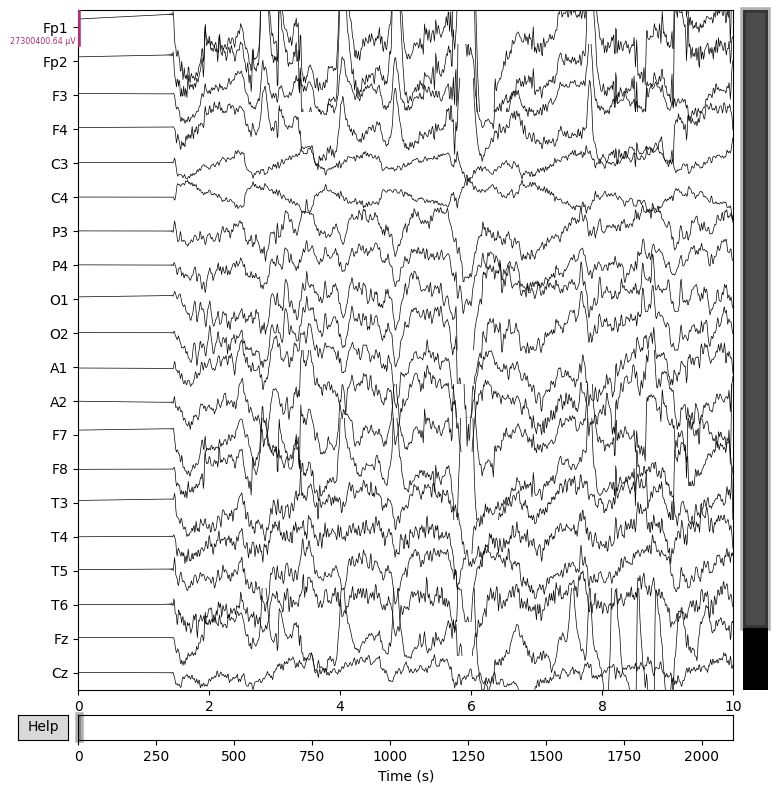

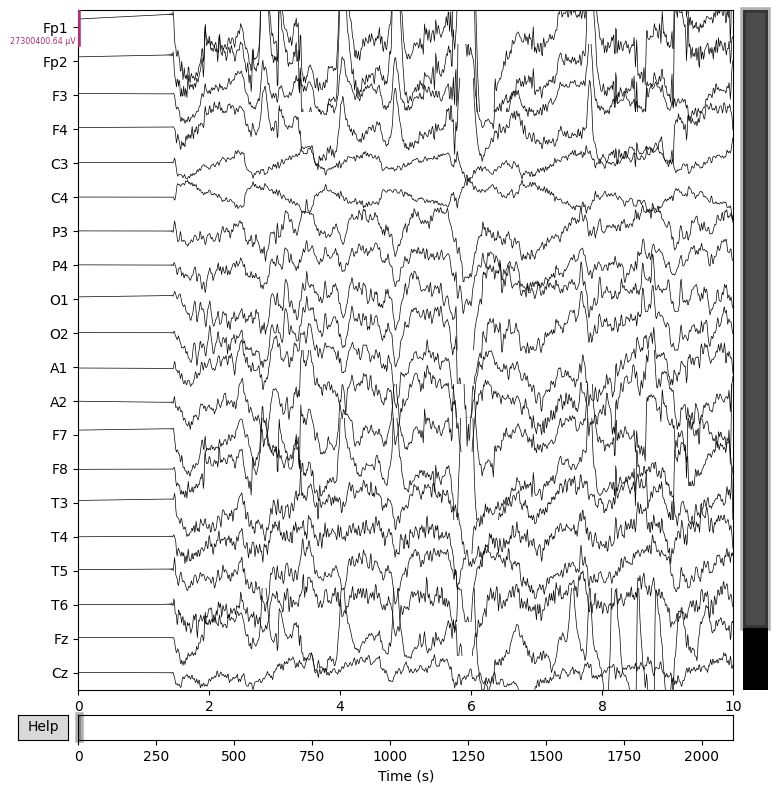

In [67]:
filtered_data.plot(scalings="auto")

Applying ICA to Raw instance
    Transforming to ICA space (21 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components


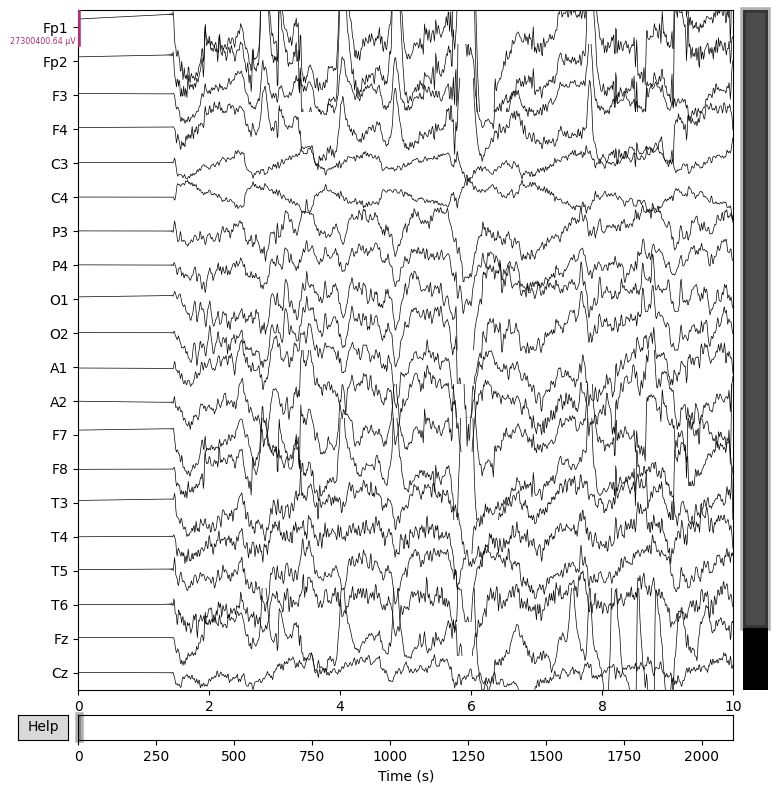

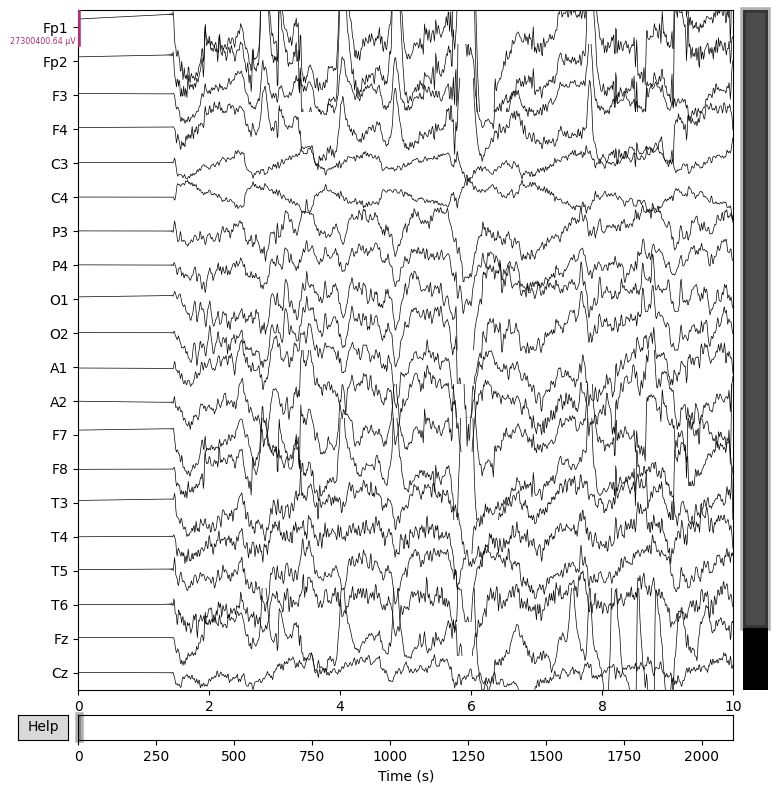

In [68]:
eeg_ica = filtered_data.copy()
eeg_ica.load_data()
ica_obj.apply(eeg_ica)
eeg_ica.plot(scalings="auto")

In [69]:
def average_reference_func(raw):
    return raw.load_data().set_eeg_reference(ref_channels='average')
eeg_ica = average_reference_func(eeg_ica)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [70]:
from mne_icalabel import label_components

ica = mne.preprocessing.ICA(n_components=21, random_state=36, method="infomax")
ica.fit(filtered_data)


Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 21 components
 
Fitting ICA took 32.1s.


<ICA | raw data decomposition, method: infomax (fit in 500 iterations on 420231 samples), 21 ICA components (21 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=21, n_times=420231
    Range : 0 ... 420230 =      0.000 ...  2101.150 secs
Ready.


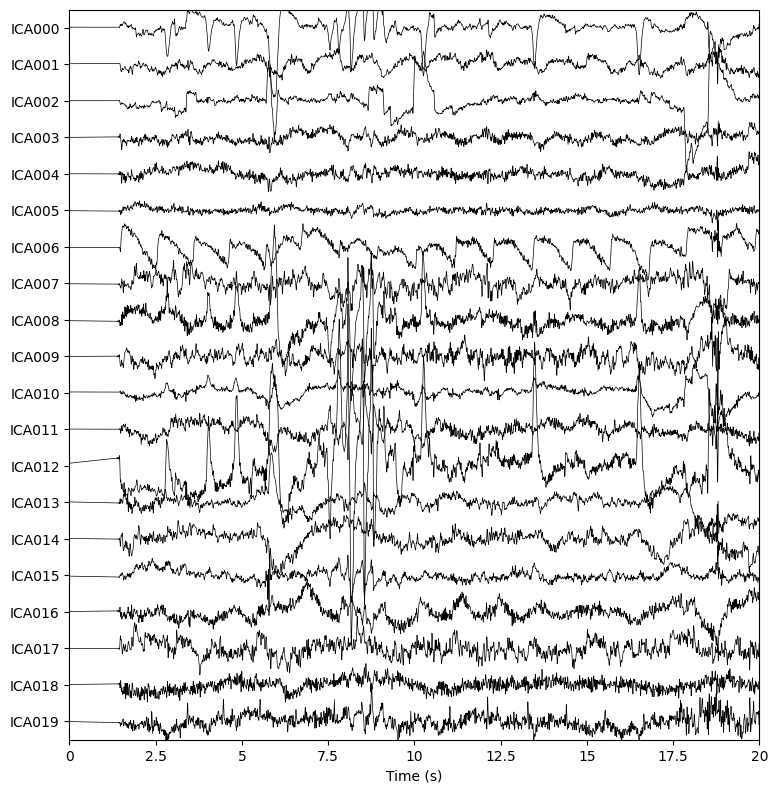

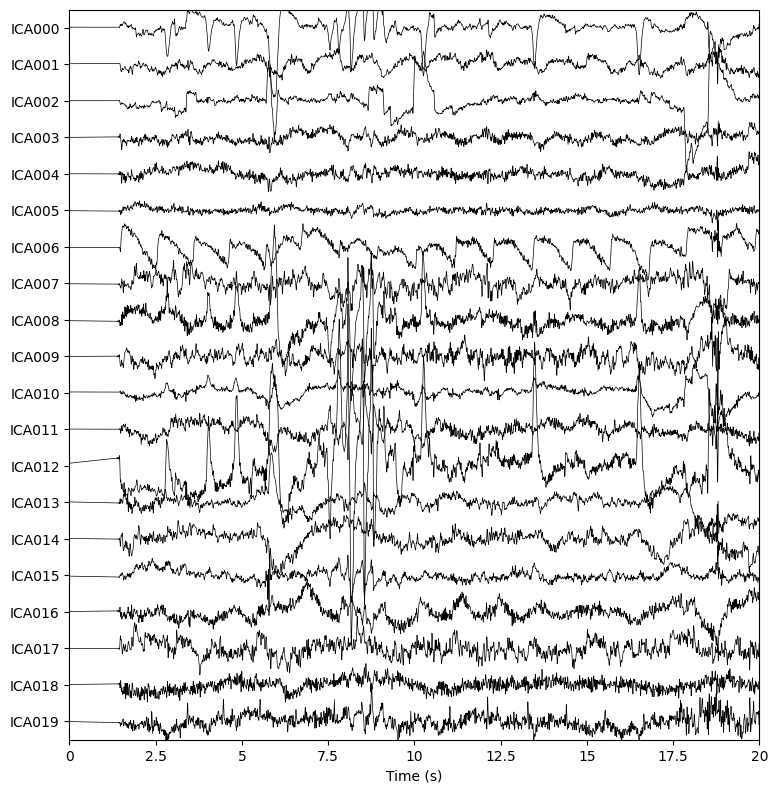

In [71]:
raw_data.load_data()
ica.plot_sources(filtered_data, show_scrollbars=False, show=True)

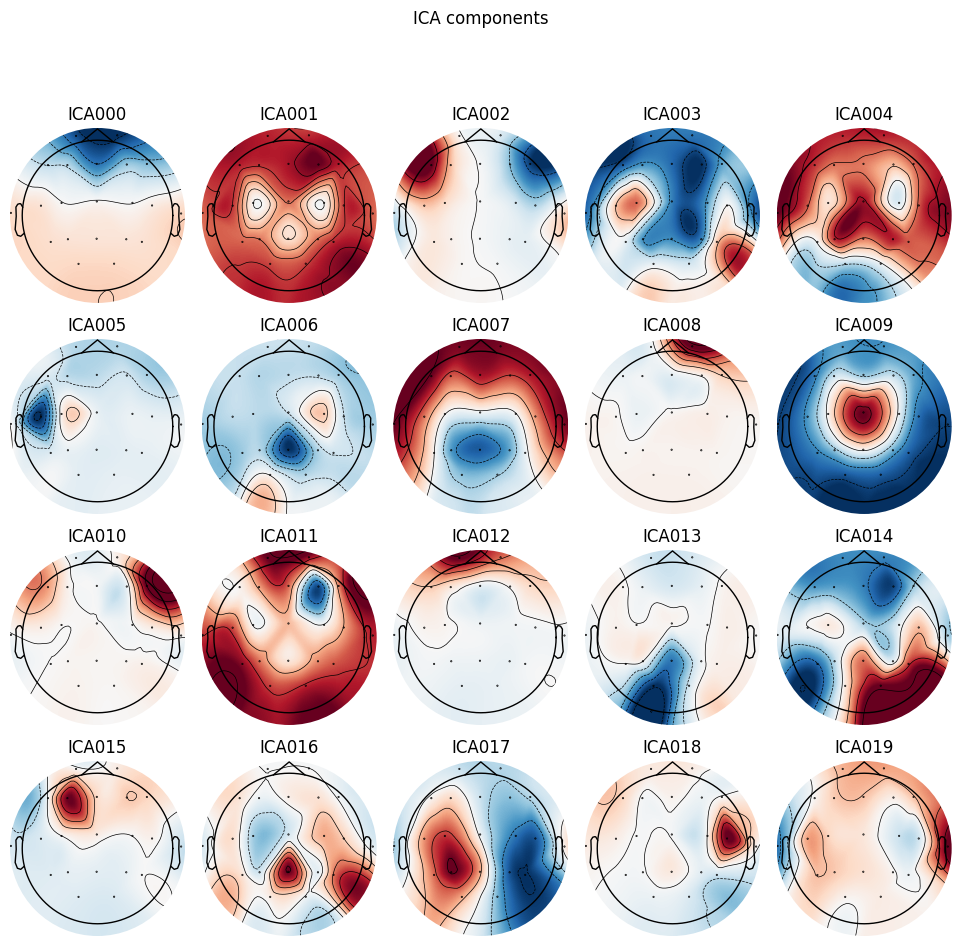

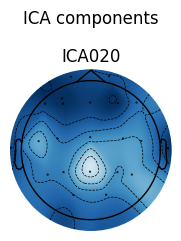

Applying ICA to Raw instance
    Transforming to ICA space (21 components)
    Zeroing out 1 ICA component
    Projecting back using 21 PCA components


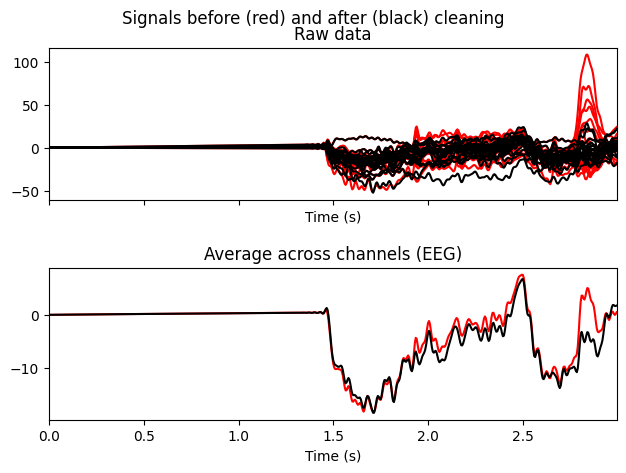

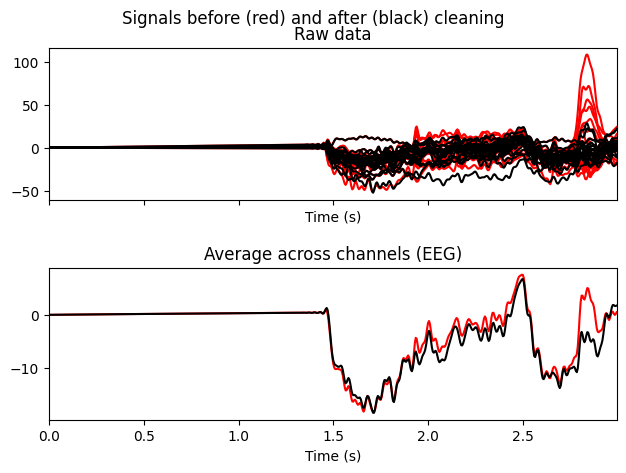

In [72]:
ica.plot_components()

# blinks
ica.plot_overlay(raw_data, exclude=[0], picks="eeg")

In [73]:
ic_labels = label_components(filtered_data, ica, method="iclabel")

print(ic_labels["labels"])


C:\Users\alexa\AppData\Local\Temp\ipykernel_8808\4676299.py:1: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(filtered_data, ica, method="iclabel")
C:\Users\alexa\AppData\Local\Temp\ipykernel_8808\4676299.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(filtered_data, ica, method="iclabel")
C:\Users\alexa\AppData\Local\Temp\ipykernel_8808\4676299.py:1: RuntimeWarning: The provided ICA instance was fitted with a 'infomax' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use th

['other', 'brain', 'eye blink', 'brain', 'other', 'muscle artifact', 'brain', 'brain', 'other', 'brain', 'other', 'other', 'eye blink', 'brain', 'brain', 'muscle artifact', 'brain', 'brain', 'muscle artifact', 'brain', 'brain']


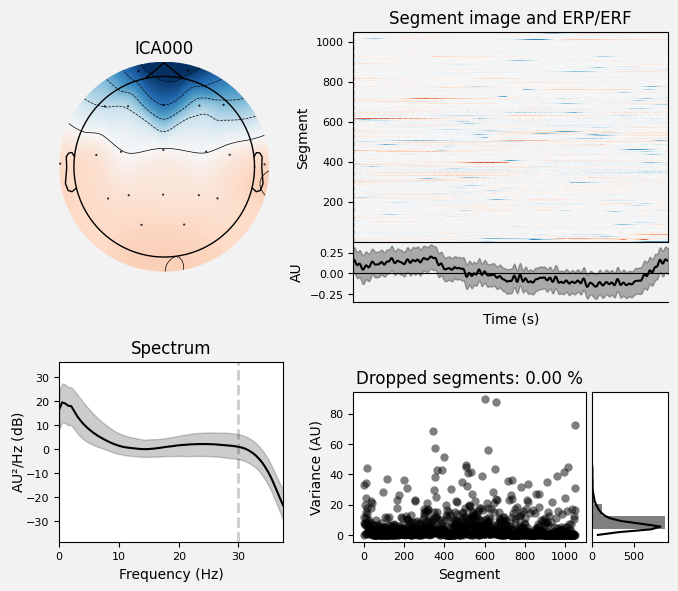

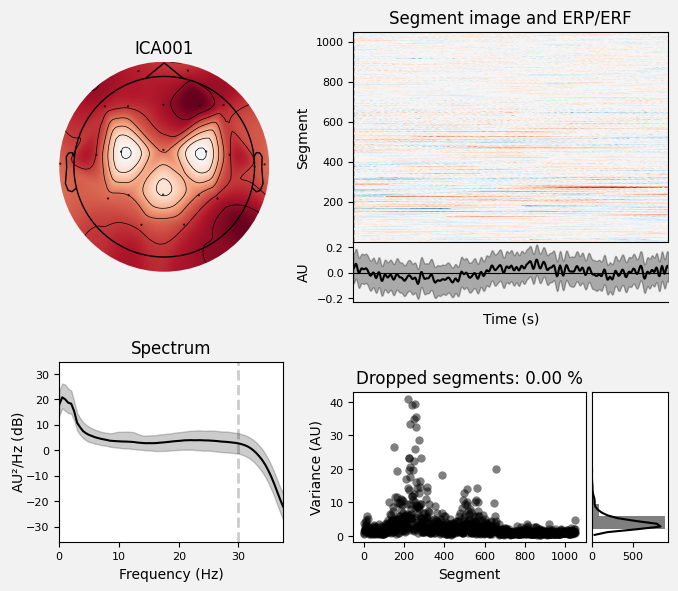

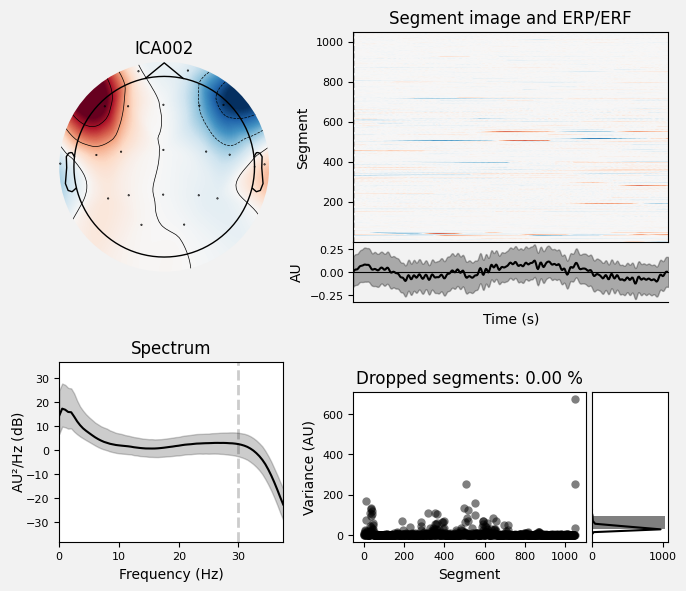

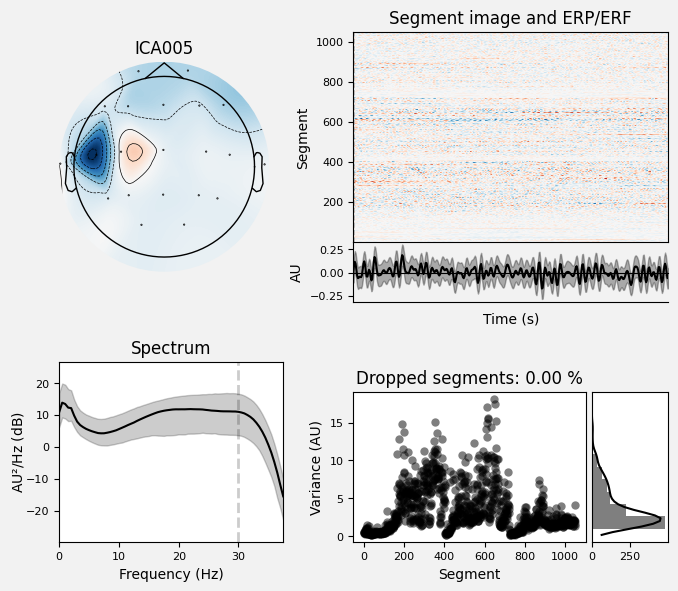

Excluding these ICA components: [2, 5, 12, 15, 18]


In [74]:
ica.plot_properties(raw_data, picks=[0, 1, 2,5], verbose=False)

labels = ic_labels["labels"]
exclude_idx = [idx for idx, label in enumerate(labels) if label not in ["brain", "other"]]
print(f"Excluding these ICA components: {exclude_idx}")



Applying ICA to Raw instance
    Transforming to ICA space (21 components)
    Zeroing out 5 ICA components
    Projecting back using 21 PCA components


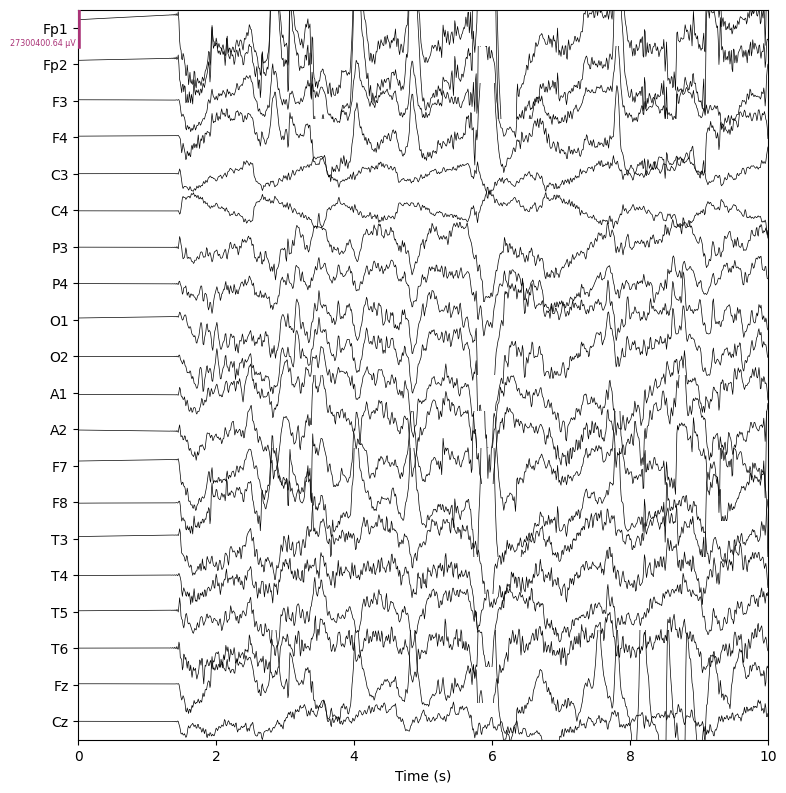

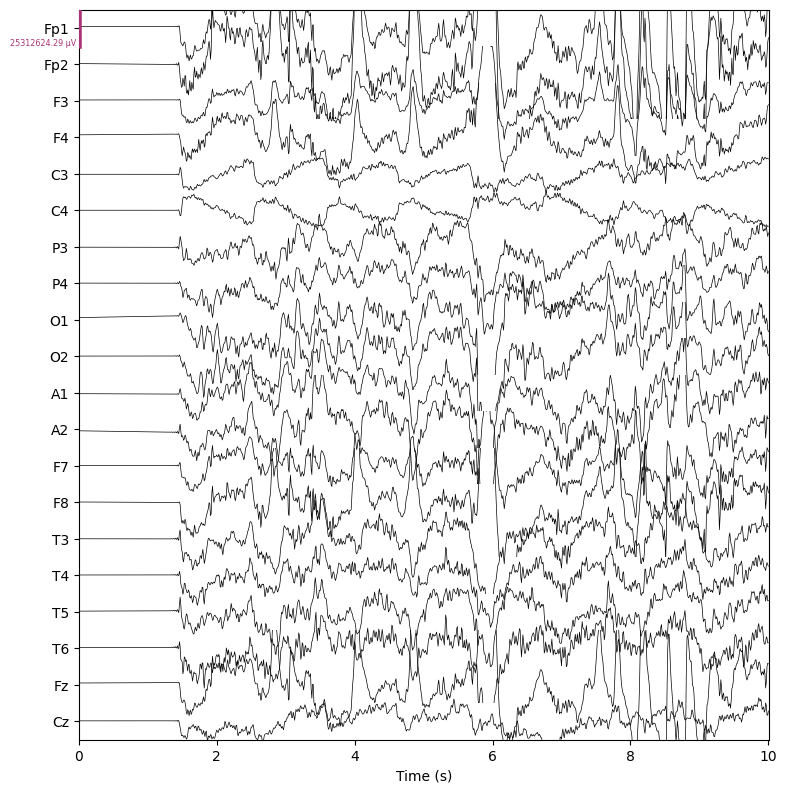

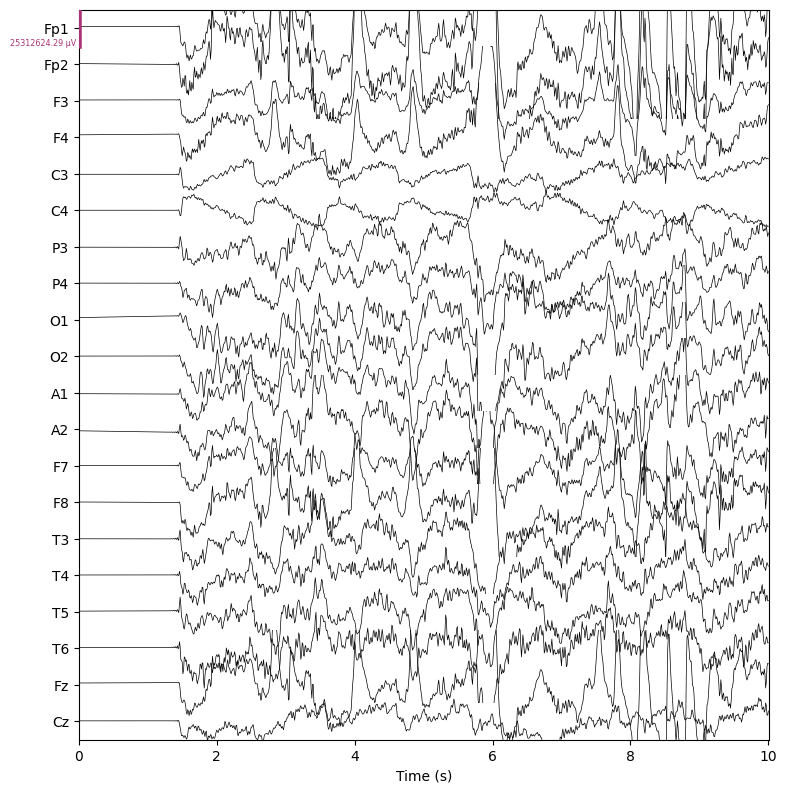

In [75]:
reconst_raw = filtered_data.copy()
ica.apply(reconst_raw, exclude=exclude_idx)
raw_data.plot(show_scrollbars=False, scalings="auto")
reconst_raw.plot(show_scrollbars=False, scalings="auto")
